4853/4853 [==============================] - 12s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     77676
           1       0.91      0.89      0.90     77614

    accuracy                           0.90    155290
   macro avg       0.90      0.90      0.90    155290
weighted avg       0.90      0.90      0.90    155290



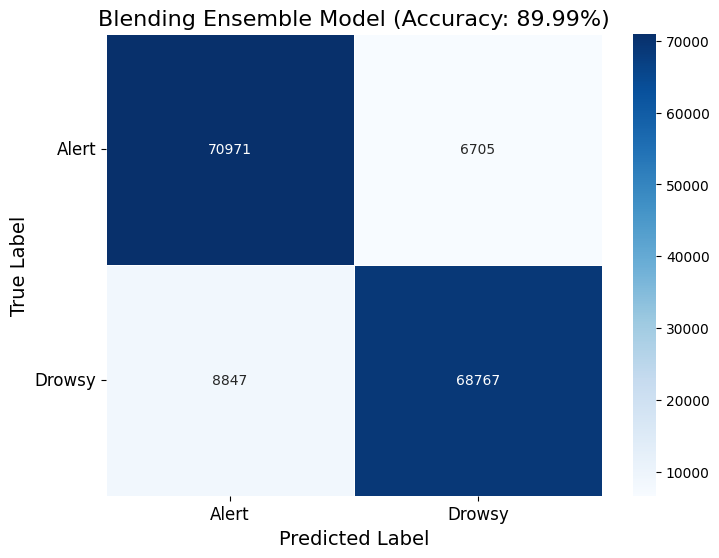

Accuracy: 0.8998518900122352
Precision: 0.9111591053635786
Recall: 0.886012832736362
F1-score: 0.8984100440275401
AUC-ROC: 0.9654029335648153


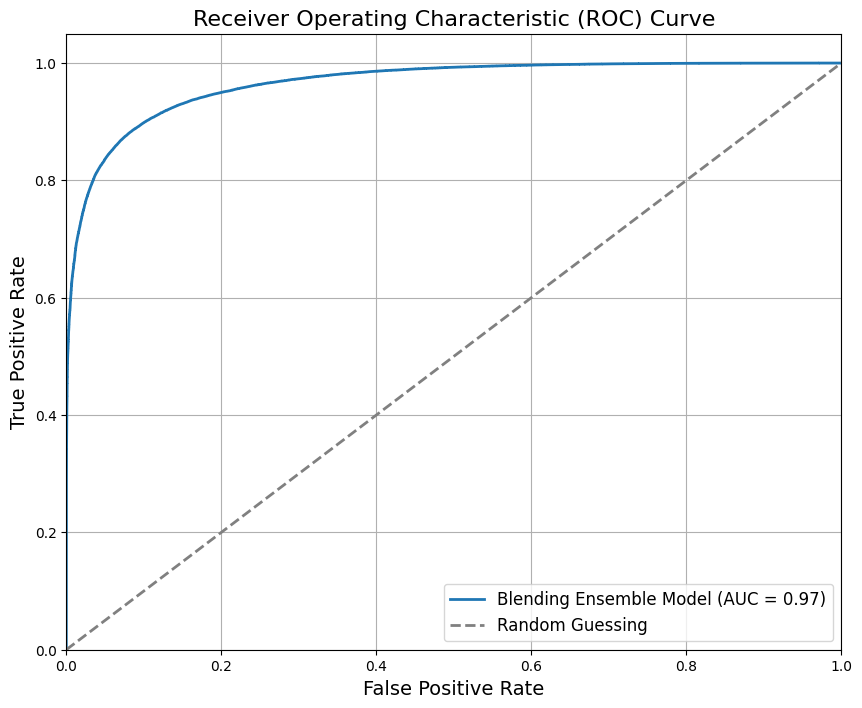

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load data
X_train = np.load('../Train Test Dataset - Feature 5/X_train.npy')
X_test = np.load('../Train Test Dataset - Feature 5/X_test.npy')
y_train = np.load('../Train Test Dataset - Feature 5/y_train.npy')
y_test = np.load('../Train Test Dataset - Feature 5/y_test.npy')

# Load models
from tensorflow.keras.models import load_model
ann_model = load_model('../H5 Files/ANN_Architecture_5_Features.h5')
lstm_model = load_model('../H5 Files/LSTM_Architecture_5_Features.h5')
gru_model = load_model('../H5 Files/GRU_Architecture_5_Features.h5')

# Get predictions from base models
ann_pred_test = ann_model.predict(X_test)
lstm_pred_test = lstm_model.predict(X_test)
gru_pred_test = gru_model.predict(X_test)

# Blending by averaging the predictions
ensemble_pred_test_proba = (ann_pred_test + lstm_pred_test + gru_pred_test) / 3
ensemble_pred_test = (ensemble_pred_test_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Classification Report
classification_report_str = classification_report(y_test, ensemble_pred_test)
print(classification_report_str)

# Confusion Matrix
class_labels = ["Alert", "Drowsy"]
conf_matrix = confusion_matrix(y_test, ensemble_pred_test)
accuracy = accuracy_score(y_test, ensemble_pred_test) * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels, linewidths=.5)

plt.title(f'Blending Ensemble Model (Accuracy: {accuracy:.2f}%)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, ensemble_pred_test)
precision = precision_score(y_test, ensemble_pred_test)
recall = recall_score(y_test, ensemble_pred_test)
f1 = f1_score(y_test, ensemble_pred_test)
auc_roc = roc_auc_score(y_test, ensemble_pred_test_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

# ROC Curve
roc_data = {}

fpr, tpr, thresholds = roc_curve(y_test, ensemble_pred_test_proba)
roc_auc = auc(fpr, tpr)
roc_data['Blending Ensemble Model'] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plotting ROC Curve
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()
